In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from __init__ import *
# from runner.svg2plan import run_new_layout
from new_solutions.selection import *
from domains.domain import Domain

from read.svg_reader import SVGReader
from adjacencies.adjacency import AdjacencyGenerator
from adjacencies.connectivity import ConnectivityGenerator
from placement.executer import PlacementExecuter
from visuals.plotter import Plotter, plot_general
from export.saver import save_pickle
from placement2.place import create_placement_and_update_layout

In [13]:
case  ="amber_c_f01.svg"
sv = SVGReader(case)
sv.run()

No reference for svg to meters conversion!! 


In [14]:
sv.layout.domains

{'m_bed': Domain(m_bed, x=[0.11-2.24], y=[8.87-11.32]),
 'bed1_closet': Domain(bed1_closet, x=[3.03-4.18], y=[8.42-8.79]),
 'transit': Domain(transit, x=[1.79-2.94], y=[7.83-8.79]),
 'm_closet': Domain(m_closet, x=[0.11-1.58], y=[7.94-8.82]),
 'laundry': Domain(laundry, x=[3.03-4.18], y=[7.25-8.34]),
 'den': Domain(den, x=[2.37-4.18], y=[5.12-7.17]),
 'kitchen': Domain(kitchen, x=[0.11-1.58], y=[2.60-5.27]),
 'living': Domain(living, x=[0.11-3.27], y=[0.00-2.42]),
 'dining': Domain(dining, x=[1.73-3.27], y=[2.42-5.02]),
 'den_closet': Domain(den_closet, x=[3.38-4.18], y=[4.66-5.02]),
 'm_bath': Domain(m_bath, x=[0.00-1.61], y=[6.49-7.73]),
 'bath': Domain(bath, x=[0.03-1.61], y=[5.43-6.36]),
 'linen': Domain(linen, x=[2.37-2.94], y=[7.25-7.64]),
 'corridor': Domain(corridor, x=[1.79-2.24], y=[5.02-7.73]),
 'bed1': Domain(bed1, x=[2.37-4.18], y=[8.87-11.32])}

In [15]:
plot_general(sv.layout.domains)

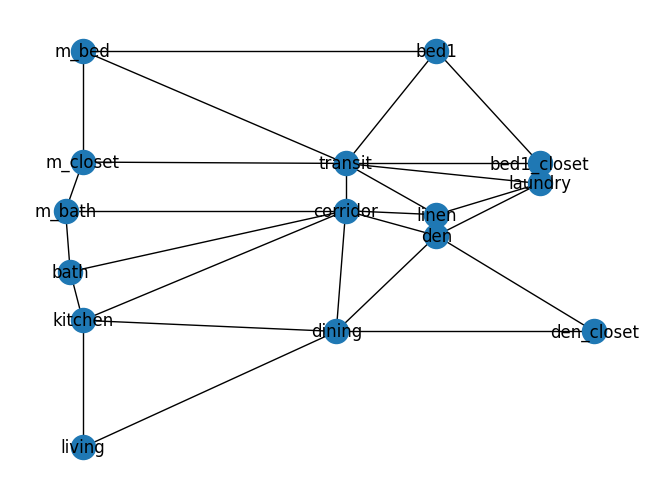

In [16]:
ag = AdjacencyGenerator(sv.layout, buffer_size=0.11)
ag.run()
ag.draw_graph()

In [20]:
playout = create_placement_and_update_layout(ag.layout)

In [21]:
plot_general(playout.domains)

In [22]:
re = Reporter(playout)
re.run()

In [23]:
re.problems

[Problem(ix=1, HOLE, ['corridor', 'dining', 'den_closet', 'den'], resolved=False,  n_actions=4,
 Problem(ix=2, OVERLAP, ['laundry', 'den'], resolved=False,  n_actions=4,
 Problem(ix=3, OVERLAP, ['den', 'corridor'], resolved=False,  n_actions=2,
 Problem(ix=4, SIDE_HOLE, ['living', 'den_closet'], resolved=False,  n_actions=2,
 Problem(ix=5, OVERLAP, ['transit', 'linen'], resolved=False,  n_actions=2,
 Problem(ix=6, HOLE, ['bath', 'corridor', 'dining', 'den'], resolved=False,  n_actions=4,
 Problem(ix=7, OVERLAP, ['dining', 'corridor'], resolved=False,  n_actions=2]

In [24]:
c = Cook(re)



Exception: Problem domains should have a relationship!

In [ ]:
c.plot_all()